# Preprocessing Data for RNN:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("international-airline-passengers.csv",usecols=[1])
df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0
...,...
140,508.0
141,461.0
142,390.0
143,432.0


In [3]:
values=df.values.astype("float32")
values.shape

(145, 1)

In [4]:
train_size=int(values.shape[0]*0.67)
train_size

97

In [5]:
test_size=values.shape[0]-train_size
test_size

48

In [6]:
train=values[0:train_size]
test=values[train_size:]

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))

In [9]:
train=scaler.fit_transform(train)
test=scaler.transform(test)

In [10]:
def create_dataset(data,k):
    dataX,dataY=[],[]
    for i in range(data.shape[0]-k):
        X=data[i:i+k,0]
        Y=data[i+k,0]
        dataX.append(X)
        dataY.append(Y)
    return np.array(dataX), np.array(dataY)

In [11]:
create_dataset(test,12)

(array([[0.63754046, 0.815534  , 0.7896441 , 0.8122978 , 1.0291263 ,
         1.1682849 , 1.1747574 , 0.97087383, 0.7864078 , 0.6504855 ,
         0.7508091 , 0.7637541 ],
        [0.815534  , 0.7896441 , 0.8122978 , 1.0291263 , 1.1682849 ,
         1.1747574 , 0.97087383, 0.7864078 , 0.6504855 , 0.7508091 ,
         0.7637541 , 0.69255674],
        [0.7896441 , 0.8122978 , 1.0291263 , 1.1682849 , 1.1747574 ,
         0.97087383, 0.7864078 , 0.6504855 , 0.7508091 , 0.7637541 ,
         0.69255674, 0.8349515 ],
        [0.8122978 , 1.0291263 , 1.1682849 , 1.1747574 , 0.97087383,
         0.7864078 , 0.6504855 , 0.7508091 , 0.7637541 , 0.69255674,
         0.8349515 , 0.7896441 ],
        [1.0291263 , 1.1682849 , 1.1747574 , 0.97087383, 0.7864078 ,
         0.6504855 , 0.7508091 , 0.7637541 , 0.69255674, 0.8349515 ,
         0.7896441 , 0.8381878 ],
        [1.1682849 , 1.1747574 , 0.97087383, 0.7864078 , 0.6504855 ,
         0.7508091 , 0.7637541 , 0.69255674, 0.8349515 , 0.7896441 ,
  

In [12]:
look_back=12
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)
trainX.shape

(85, 12)

In [13]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))
trainX.shape

(85, 12, 1)

# Setting Up the RNN Model:

In [14]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

In [15]:
model=Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))

In [16]:
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [17]:
model.fit(trainX,trainY,epochs=10,batch_size=1)

Epoch 1/10
85/85 [==============================] - 0s 2ms/step - loss: 0.0577
Epoch 2/10
85/85 [==============================] - 0s 2ms/step - loss: 0.0361
Epoch 3/10
85/85 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 4/10
85/85 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 5/10
85/85 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 6/10
85/85 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 7/10
85/85 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 8/10
85/85 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 9/10
85/85 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 10/10
85/85 [==============================] - 0s 2ms/step - loss: 0.0129


# Analysis the Output:

In [18]:
testPredict=model.predict(testX)
testPredict

array([[0.62436336],
       [0.61523205],
       [0.64557517],
       [0.6298478 ],
       [0.64748573],
       [0.67651844],
       [0.68717235],
       [0.68138844],
       [0.64119333],
       [0.6354327 ],
       [0.599026  ],
       [0.6316152 ],
       [0.6365157 ],
       [0.6314318 ],
       [0.6688637 ],
       [0.65219206],
       [0.6713009 ],
       [0.6804231 ],
       [0.6953524 ],
       [0.68349284],
       [0.6574305 ],
       [0.6496649 ],
       [0.6308139 ],
       [0.664424  ],
       [0.65968496],
       [0.6522822 ],
       [0.66663855],
       [0.6783622 ],
       [0.6761113 ],
       [0.69199663],
       [0.69588894],
       [0.6826358 ],
       [0.6640857 ],
       [0.6633716 ],
       [0.637607  ],
       [0.6727566 ]], dtype=float32)

In [19]:
testPredict=scaler.inverse_transform(testPredict).ravel()
testPredict.shape

(36,)

In [20]:
trainPredict=model.predict(trainX)
trainPredict=scaler.inverse_transform(trainPredict).ravel()

In [21]:
testTrue=scaler.inverse_transform([testY]).ravel()
trainTrue=scaler.inverse_transform([trainY]).ravel()

In [22]:
testPredict.shape, testTrue.shape

((36,), (36,))

In [23]:
import matplotlib.pyplot as plt

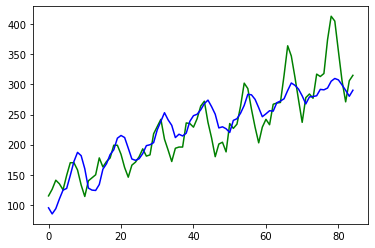

In [24]:
plt.plot(trainTrue,c="g")
plt.plot(trainPredict, c="b")
plt.show()

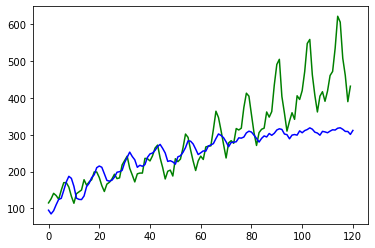

In [25]:
combinedPredict=np.concatenate((trainPredict,testPredict))
combinedTrue=np.concatenate((trainTrue,testTrue))
plt.plot(combinedTrue,c="g")
plt.plot(combinedPredict,c="b")
plt.show()